<a href="https://colab.research.google.com/github/joaorihan/Data-Science/blob/main/fiap/regressao_multipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Importação de módulos - - - - - - - - - - - - - - - - - - - - - - -#
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [3]:
## carrega os dados a partir de um csv
arquivo_csv = "insurance.csv"
data_frame = pd.read_csv(arquivo_csv)

In [4]:
print(data_frame.head(), end="\n\n")
print(data_frame.describe())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [6]:
## trocas as classes por uma enumeração de 0 até o número de classes -1
le = LabelEncoder()

## o método fit determinar uma enumeração das classes
## o método transform aplica a enumeração num campo
le.fit(data_frame.sex)
data_frame.sex = le.transform(data_frame.sex)

In [7]:
le.fit(data_frame.smoker)
data_frame.smoker = le.transform(data_frame.smoker)

## a instrução abaixo mostra que há 4 regiões distintas
# print(data_frame['region'].value_counts())
le.fit(data_frame.region)
data_frame.region = le.transform(data_frame.region)

## exibe um resumo dos dados após as transformações
print(data_frame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB
None


In [8]:
tabela_correlacao = data_frame.corr()
print(tabela_correlacao)

               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181  0.787251
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000 -0.006208
charges   0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208  1.000000


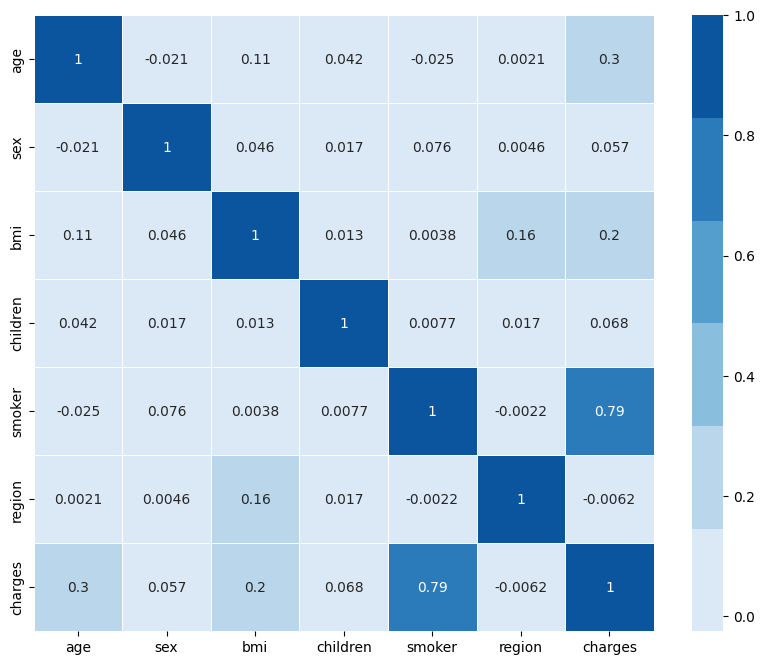

In [9]:
## visualização gráfica da tabela de correlação
figura, eixo = plt.subplots(figsize=(10,8))
sns.heatmap(tabela_correlacao,
            cmap=sns.color_palette("Blues"),
            linewidths=.5,
            annot=True)
plt.show()

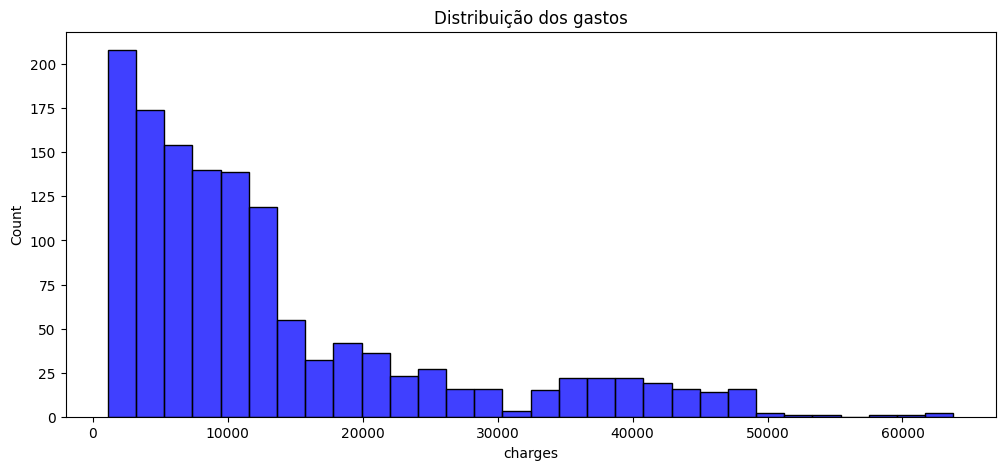

<Figure size 1700x600 with 0 Axes>

In [12]:

## analisando a distribuição dos gastos
plt.figure(figsize=(12,5))
plt.title("Distribuição dos gastos")
eixo = sns.histplot(data_frame['charges'], color='b')
plt.show()

## analisando os gastos para fumantes e não fumantes
fig_fumantes = plt.figure(figsize=(17,6))

In [17]:
## cria o gráfico para fumantes
eixo = fig_fumantes.add_subplot(121)
sns.histplot(data_frame[ (data_frame.smoker == 1) ]['charges'],
             color='r',
             ax=eixo,)
eixo.set_title('Distribuição dos gastos dos fumantes')
plt.show()

In [15]:
## cria o gráfico para não fumantes
eixo = fig_fumantes.add_subplot(122)
sns.histplot(data_frame[ (data_frame.smoker == 0) ]['charges'],
             color='b',
             ax=eixo)
eixo.set_title('Distribuição dos gastos dos não fumantes')

plt.show()

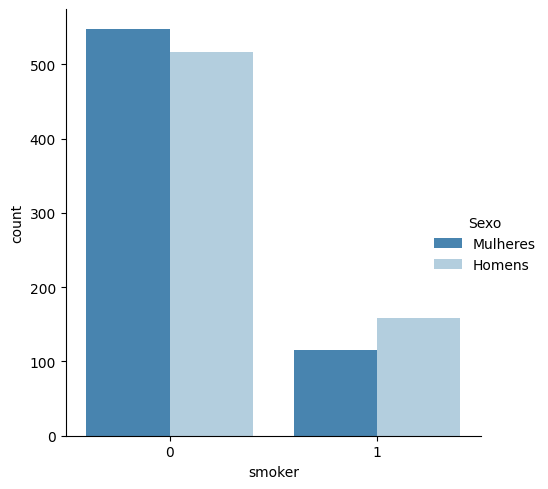

In [28]:
## analisando a distribuição de fumantes e não fumantes por sexo
fig_fumante_sexo = sns.catplot(x='smoker',
                               kind='count',
                               hue='sex',
                               palette="Blues_r",
                               data=data_frame,
                               legend_out=True)

#fig_fumante_sexo.set_axis_labels("", "Total").set_xticklabels(["Não Fuamnte"], ["Fumante"])
fig_fumante_sexo._legend.set_title('Sexo')
new_labels = ['Mulheres', 'Homens']

for t, l in zip (fig_fumante_sexo._legend.texts, new_labels):
    t.set_text(l)

plt.show()

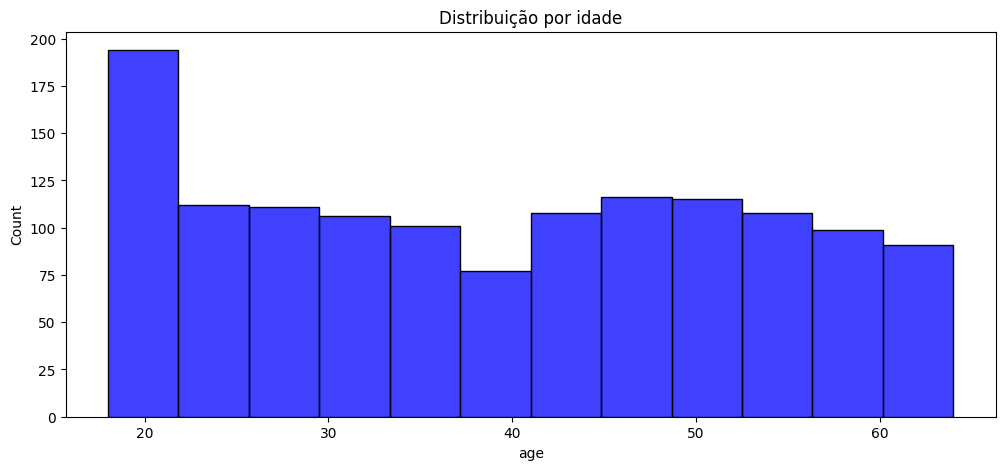

In [18]:
## analisando os dados dos contratanes por idade
plt.figure(figsize=(12,5))
plt.title("Distribuição por idade")
eixo = sns.histplot(data_frame["age"], color='b')
plt.show()

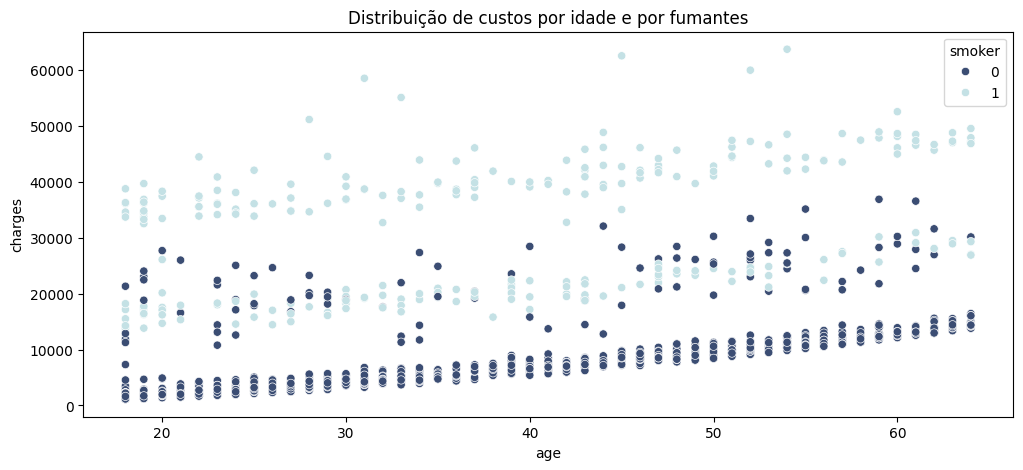

In [19]:
## analisando a distribuição dos custos dos fumantes por idade
plt.figure(figsize=(12,5))
plt.title("Distribuição de custos por idade e por fumantes")
sns.scatterplot(x=data_frame.age,
                y=data_frame.charges,
                hue=data_frame.smoker,
                sizes=(12,5),
                palette="ch:r=-.2,d=.3_r")
plt.show()

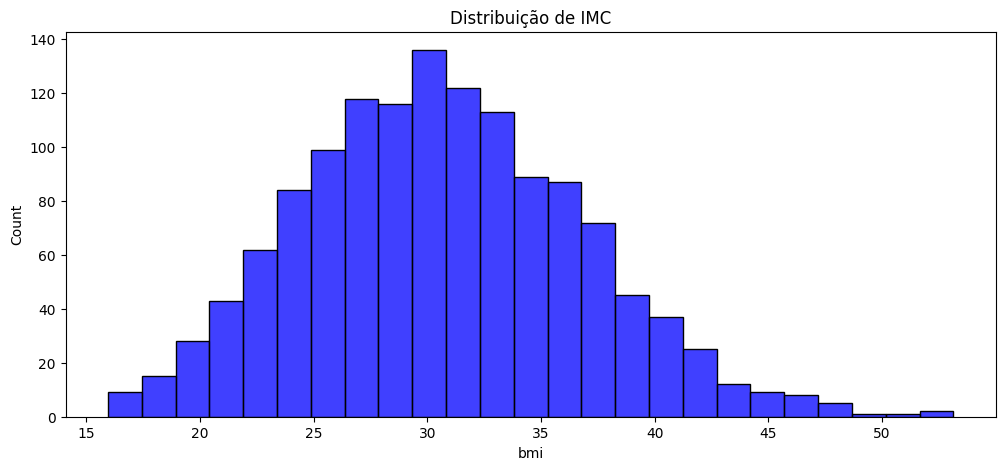

In [20]:
## analisnado o IMC, ou BMI, nos custos hospitalares
plt.figure(figsize=(12,5))
plt.title("Distribuição de IMC")
eixo = sns.histplot(data_frame['bmi'], color='b')
plt.show()

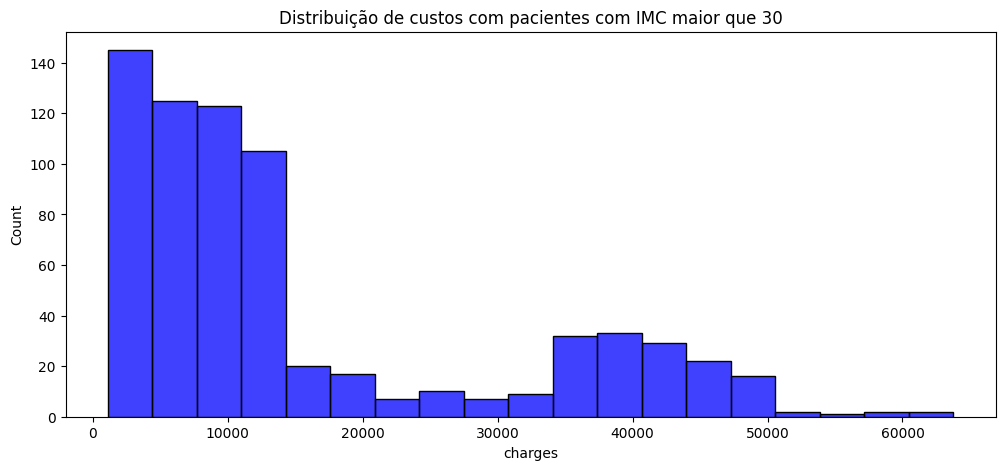

In [22]:
plt.figure(figsize=(12,5))
plt.title("Distribuição de custos com pacientes com IMC maior que 30")
eixo = sns.histplot(data_frame[ (data_frame.bmi >= 30) ]['charges'],
                    color='b')
plt.show()

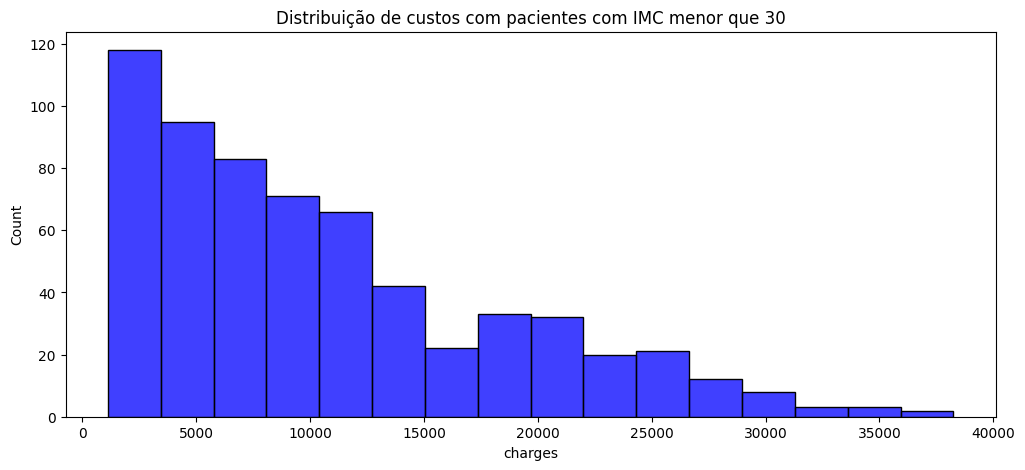

In [23]:
plt.figure(figsize=(12,5))
plt.title("Distribuição de custos com pacientes com IMC menor que 30")
eixo = sns.histplot(data_frame[ (data_frame.bmi < 30) ]['charges'],
                    color='b')
plt.show()

<ipython-input-24-b337c4d57e5c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="children",


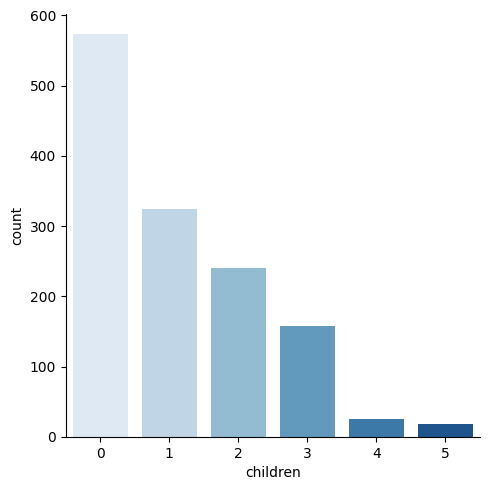

In [24]:
sns.catplot(x="children",
            kind="count",
            palette="Blues",
            data=data_frame)
plt.show()


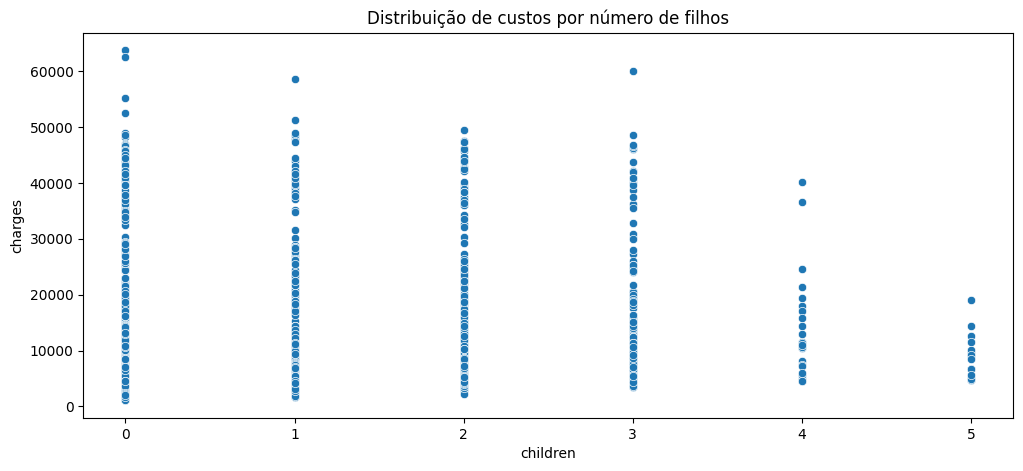

In [25]:
## analisando o número de filhos x custo hospitalar

plt.figure(figsize=(12,5))
plt.title("Distribuição de custos por número de filhos")
sns.scatterplot(x=data_frame.children,
                y=data_frame.charges,
                sizes=(12,5))
plt.show()

In [26]:
## Etapa 4 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -#
## Para construi o modelo, vamos separar as variáveis preditoras da   #
## variável alvo                                                      #
df_var_preditoras = data_frame.drop(['charges','children'], axis=1)
df_var_alo = data_frame.charges

## criando os dados de treino e teste
## test_size=0.2 indica 80% dos dados para treino e 20% para teste
x_train, x_test, y_train, y_test = train_test_split(df_var_preditoras,
                                                   df_var_alo,
                                                   test_size=0.2,
                                                   random_state=0)
modelo_reg_multi = LinearRegression()
## treina o modelo (obtém os coeficientes) a partir dos dados de treino
modelo_reg_multi.fit(x_train, y_train)

## este coeficiente diz o quanto um modelo é capaz de se ajustar a amostra
## ele varia de 0 a 1, quanto mais próximo de 1 mais o modelo se ajusta a
## amostra
r_sq = modelo_reg_multi.score(df_var_preditoras, df_var_alo)
print(f"Coeficiente de Determinação (R^2): {r_sq}")

Coeficiente de Determinação (R^2): 0.7483109813455664


In [27]:
print(f"Intercepto: {modelo_reg_multi.intercept_}")
coeficientes = pd.DataFrame(modelo_reg_multi.coef_,
                            df_var_preditoras.columns,
                            columns=['Coeficiente'])
print(f"Coeficientes: {coeficientes}")

## calculo dos erros
y_predicao = modelo_reg_multi.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_predicao))
print('MSE:', metrics.mean_squared_error(y_test, y_predicao))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predicao)))
## remoção da variável 'age' aumenta o erro
## remoção da variável 'bmi' aumenta um pouco o erro
## remoção da variável 'children' aumenta um pouco o erro médio, mas
## aumenta bastante o erro RMSE

Intercepto: -11345.90569905465
Coeficientes:          Coeficiente
age       256.222137
sex         4.900860
bmi       328.917045
smoker  23607.455003
region   -264.275221
MAE: 3941.760652749391
MSE: 32361789.81900917
RMSE: 5688.742375869131
